###  Fully Automated Trading Bot: eth  ###

In [3]:
# Initial imports
import numpy 

import pandas as pd
from pathlib import Path

import hvplot.pandas

import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
%matplotlib inline

In [38]:
# from dotenv import load_dotenv     this is to read the alpacha API 
# now import ETH data, clean it 

In [39]:
# note, you will need to run the following code in the terminal 

# conda activate alpacaenv
# jupyter lab --ContentsManager.allow_hidden=True

In [40]:
shares_data = {
    "shares": [200, 1000, 100]
}

# Set the tickers
tickers = ["NVDA", "HD", "AMZN"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
NVDA,200
HD,1000
AMZN,100


In [8]:
shares_data.hvplot(x="shares", y="tickers", kinda='line')

NameError: name 'shares_data' is not defined

In [41]:
# T or F   if false, bot wont read data from api  

load_dotenv()

True

In [42]:
# reading A_api and A_secret, saved on a .env file 
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [43]:
# type should be str 
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [44]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [45]:
today = pd.Timestamp("2022-1-2", tz="America/New_York").isoformat()
today2 = pd.Timestamp("2023-1-2", tz="America/New_York").isoformat()

In [46]:
timeframe = "1Day"

In [47]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today2
).df

df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-01-03 05:00:00+00:00,3351.00,3414.0700,3323.2100,3408.09,3192069,187619,3389.105982,AMZN
2022-01-04 05:00:00+00:00,3408.76,3428.0000,3326.9900,3350.44,3533192,216128,3358.544328,AMZN
2022-01-05 05:00:00+00:00,3337.66,3342.5250,3287.4775,3288.00,2928413,208396,3314.418692,AMZN
2022-01-06 05:00:00+00:00,3269.01,3296.0000,3238.7442,3265.08,2592981,187193,3268.051841,AMZN
2022-01-07 05:00:00+00:00,3276.78,3304.8650,3240.6200,3251.08,2325632,156769,3259.961282,AMZN
...,...,...,...,...,...,...,...,...
2022-12-23 05:00:00+00:00,151.96,153.3900,148.8300,152.06,34932168,317423,151.310191,NVDA
2022-12-27 05:00:00+00:00,150.74,151.0000,140.5600,141.21,46490226,425861,144.073615,NVDA
2022-12-28 05:00:00+00:00,139.27,142.6200,138.8400,140.36,35192444,314623,140.628601,NVDA


In [48]:
# this is an error    :/   


df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today2
).df

# Reorganize the DataFrame
# Separate ticker data
NVDA_usd = df_portfolio[df_portfolio['symbol']=='NVDA'].drop('symbol', axis=1)
HD_usd = df_portfolio[df_portfolio['symbol']=='HD'].drop('symbol', axis=1)
AMZN_usd = df_portfolio[df_portfolio['symbol']=='HD'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([HD_usd, AMZN_usd, NVDA_usd],axis=1, keys=['NVDA','HD','AMZN'])

# Display sample data
df_portfolio

NVDA                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-01-03 05:00:00+00:00  416.57  417.8446  403.2600  408.64  3720356   
2022-01-04 05:00:00+00:00  408.64  413.6100  408.1900  412.84  3264571   
2022-01-05 05:00:00+00:00  414.00  414.2200  406.8100  407.24  4418925   
2022-01-06 05:00:00+00:00  408.56  409.0700  403.0200  405.76  3307365   
2022-01-07 05:00:00+00:00  403.36  404.0900  392.8800  393.61  4514118   
...                           ...       ...       ...     ...      ...   
2022-12-23 05:00:00+00:00  314.15  319.1000  313.0600  318.73  2063033   
2022-12-27 05:00:00+00:00  318.41  321.5470  317.5100  319.55  1605480   
2022-12-28 05:00:00+00:00  320.55  321.4328  315.5000  315.73  1553822   
2022-12-29 05:00:00+00:00  318.65  321.8300  317.5900  320.41  1551671   
2022-12-30 05:00:00+00:00  317.49  318.1700  313.0218  315.86  2553216   

                                                       HD                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-01-03 05:00:00+00:00       85021  408.261522  416.57  417.8446  403.2600   
2022-01-04 05:00:00+00:00       67394  411.849520  408.64  413.6100  408.1900   
2022-01-05 05:00:00+00:00       84370  409.332906  414.00  414.2200  406.8100   
2022-01-06 05:00:00+00:00       68949  405.615956  408.56  409.0700  403.0200   
2022-01-07 05:00:00+00:00       89210  395.971177  403.36  404.0900  392.8800   
...                               ...         ...     ...       ...       ...   
2022-12-23 05:00:00+00:00       48306  317.048672  314.15  319.1000  313.0600   
2022-12-27 05:00:00+00:00       41163  319.760497  318.41  321.5470  317.5100   
2022-12-28 05:00:00+00:00       41196  317.455955  320.55  321.4328  315.5000   
2022-12-29 05:00:00+00:00       39748  320.552492  318.65  321.8300  317.5900   
2022-12-30 05:00:00+00:00       55860  315.307359  317.49  318.1700  313.0218   

                           ...                                     AMZN  \
                           ...   volume trade_count        vwap    open   
timestamp                  ...                                            
2022-01-03 05:00:00+00:00  ...  3720356       85021  408.261522  298.15   
2022-01-04 05:00:00+00:00  ...  3264571       67394  411.849520  302.77   
2022-01-05 05:00:00+00:00  ...  4418925       84370  409.332906  289.49   
2022-01-06 05:00:00+00:00  ...  3307365       68949  405.615956  276.40   
2022-01-07 05:00:00+00:00  ...  4514118       89210  395.971177  281.41   
...                        ...      ...         ...         ...     ...   
2022-12-23 05:00:00+00:00  ...  2063033       48306  317.048672  151.96   
2022-12-27 05:00:00+00:00  ...  1605480       41163  319.760497  150.74   
2022-12-28 05:00:00+00:00  ...  1553822       41196  317.455955  139.27   
2022-12-29 05:00:00+00:00  ...  1551671       39748  320.552492  144.02   
2022-12-30 05:00:00+00:00  ...  2553216       55860  315.307359  143.34   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2022-01-03 05:00:00+00:00  307.1100  297.85  301.21  39234926      585328   
2022-01-04 05:00:00+00:00  304.6800  283.49  292.90  52709575      894150   
2022-01-05 05:00:00+00:00  294.1600  275.33  275.99  47774551      834662   
2022-01-06 05:00:00+00:00  284.3799  270.65  281.78  45404918      724730   
2022-01-07 05:00:00+00:00  284.2200  270.57  272.47  40967234      638853   
...                             ...     ...     ...       ...         ...   
2022-12-23 05:00:00+00:00  153.3900  148.83  152.06  34932168      317423   
2022-12-27 05:00:00+00:00  151.0000 

In [ ]:
#clean data, drop NA ect. 


In [5]:
# df_portfolio.hvplot(x="AMAZ", y="HD", kind="line")

NameError: name 'df_portfolio' is not defined

In [ ]:
display = df_portfolio

In [49]:
AMZN_price = df_portfolio["AMZN"]["close"]
HD_price = df_portfolio["HD"]["close"]
NVDA_price = df_portfolio["NVDA"]["close"]
display(AMZN_price.tail())
display(NVDA_price.tail()) 
display(HD_price.tail())

timestamp
2022-12-23 05:00:00+00:00    152.06
2022-12-27 05:00:00+00:00    141.21
2022-12-28 05:00:00+00:00    140.36
2022-12-29 05:00:00+00:00    146.03
2022-12-30 05:00:00+00:00    146.14
Name: close, dtype: float64

timestamp
2022-12-23 05:00:00+00:00    318.73
2022-12-27 05:00:00+00:00    319.55
2022-12-28 05:00:00+00:00    315.73
2022-12-29 05:00:00+00:00    320.41
2022-12-30 05:00:00+00:00    315.86
Name: close, dtype: float64

timestamp
2022-12-23 05:00:00+00:00    318.73
2022-12-27 05:00:00+00:00    319.55
2022-12-28 05:00:00+00:00    315.73
2022-12-29 05:00:00+00:00    320.41
2022-12-30 05:00:00+00:00    315.86
Name: close, dtype: float64

In [ ]:
# AMZN_price.hvplot(x="AMAZ", y="HD", kind="line")

NameError: name 'AMZN_price' is not defined

<AxesSubplot:xlabel='timestamp'>

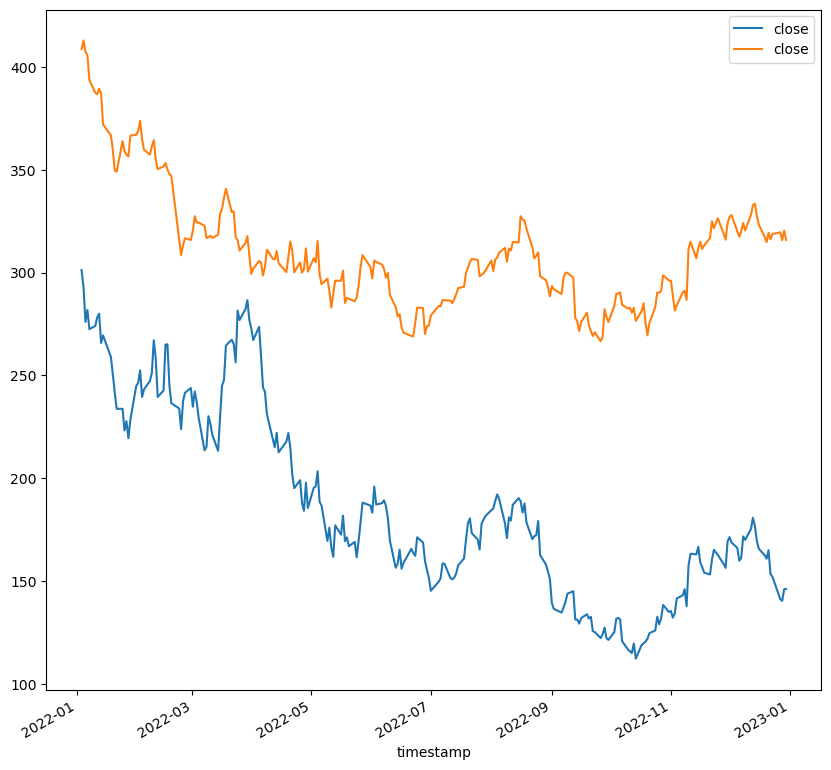

In [114]:
# make a py-viz graph that has 3 colors, title, and changable clors in the background --- find this code in unit 6 class 2-3  
#
stock_plot = df_portfolio["AMZN"]["close"].plot(legend=True, figsize=[10,10])
# stock_plot = df_portfolio["NVDA"]["close"].plot(legend=True, figsize=[10,10])
stock_plot = df_portfolio["HD"]["close"].plot(legend=True, figsize=[10,10])
stock_plot

In [62]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key, 
    'https://paper-api.alpaca.markets')

account = api.get_account()

# account = api.get_account()
print(account.status)

ACTIVE


In [74]:
self = "E57F3B12"

In [110]:
api.create_watchlist(
    "new2",
     ())

Watchlist({   'account_id': 'e57f3b12-5100-44b3-a80c-53deede44774',
    'assets': [],
    'created_at': '2023-01-06T02:37:22.919815Z',
    'id': '025f7b96-4b2a-4d7e-9701-4310e14be3b3',
    'name': 'new2',
    'updated_at': '2023-01-06T02:37:22.919815Z'})

In [111]:
# pull data from paper_t
# Fetch Account
api.add_to_watchlist("new2", "HD")
    
# rint Account Detail
# sprint(account.id, account.equity, account.status)
# api.get_account_configurations()

# df_portfolio = alpaca.get_bars(
#     tickers,
#     timeframe,
#     start = today,
#     end = today2
# ).df


APIError: watchlist is required

In [71]:
help(self)

NameError: name 'self' is not defined

In [32]:
help(alpaca)

Help on REST in module alpaca_trade_api.rest object:

class REST(builtins.object)
 |  REST(key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |  
 |  __init__(self, key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |      :param raw_data: should we return api response raw or wrap it with
 |                       Entity objects.
 |  
 |  add_to_watchlist(self, watchlist_id: str, symbol: str) -> alpaca_trade_api.entity.Watchlist
 |      Add an asset to the watchlist
 |  
 |  cancel_all_orders(self) -> None
 |      Cancel all open orders
 |  
 |  cancel_order(self, order_id: str) -> None
 |      Cancel an order
 |  
 |  close(self)
 |  
 |  close_all_positions(self) -> List[alpaca_tra

In [15]:
#https://alpaca.markets/docs/api-references/trading-api/account/


# my_portfolio = alpaca.submit_order(
#     symbol='AMZN',
#     qty=1,
#     side='buy',
#     type='market',
#     time_in_force='gtc'
# )


In [16]:
# 5 day roling average, if statments 


#if below 5 (10)(30)(ect) day rolling avg buy 

# if above 5 (10)(30)(ect) day rolling avg sell


# if the exponantal moving average (roughly =) the 200 simple moving day average bu

# if the 30 day EMA is sloping is posative, BUY 
# if the 30 day EMA is slop is negative, SELL

# when squeses is quiet 
#



In [ ]:
AMZN_value = AMZN_price * df_shares.loc["AMZN"]["shares"]
# subx_price_1 = subx_price * df_shares.loc["SBUX"]["shares"]

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AMZN']['shares']} AMZN shares is ${AMZN_value:0.2f}")
# print(f"The current value of the {df_shares.loc['sbux']['shares']} ETH/USD shares is ${subx_price_1:0.2f}")

In [ ]:
value_data = {
    "eth/btc": [eth_usd_price],
    "eth/usd": [eth_btc_price]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

In [ ]:
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

In [ ]:
# conect to paper trading acount here. 

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today2
).df

# my_portfolio = alpaca.submit_order(
#     symbol='AMZN',
#     qty=1,
#     side='buy',
#     type='market',
#     time_in_force='gtc'
# )


In [ ]:
# pull data from paper_t

In [ ]:
# display with a graph/ and or chart  

In [ ]:
# code to buy ever 2 weeks 
# buy [10] AMZN shares  ---- might looks simaler to this ------ today2 = pd.Timestamp("2023-1-2", tz="America/New_York").isoformat()



In [ ]:
# dispaly total shares owend, and price of the shares(as a block __ ie as all 10 added up and then show what a 5% increase is )


# price_we_bought_week_1 = 10 shares = 100 usd 
# price_we_sell_week_1 = 10 shares + 5% gain = 105

# if group of shares from group of price_we_bought_week_1 >= price_we_sell_week_1 
# then execute a sell trade in the amarican paper trading acount. 


# else if group of shares from group of price_we_bought_week_1 <= (dose NOT) price_we_sell_week_1 
# then hold. 




In [ ]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

In [ ]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [ ]:
today = pd.Timestamp("2022-07-14", tz="America/New_York").isoformat()

In [ ]:
tickers = ["META", "SBUX", "ETH"]

In [ ]:
timeframe = "1Day"

In [ ]:
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

In [ ]:
# add suport and resist --- 
# 